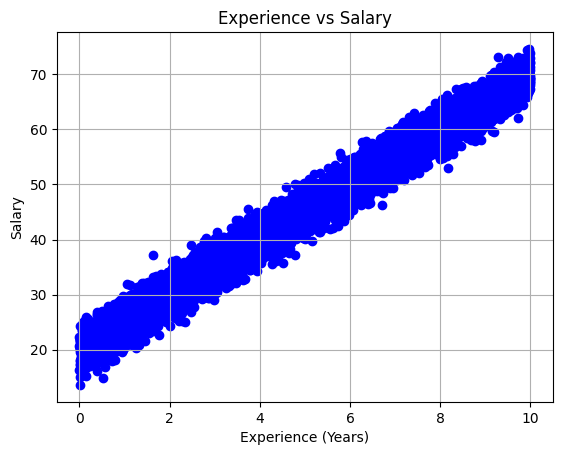

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a random seed for reproducibility
np.random.seed(42)

# Create artificial data
n = 10000
X = np.random.rand(n, 1) * 10  # X between 0 and 10
true_slope = 5  # true slope
true_intercept = 20  # true intercept
noise = np.random.randn(n, 1) * 2  # random noise
y = true_slope * X + true_intercept + noise

# Convert to pandas DataFrame
data = pd.DataFrame(data=np.hstack([X, y]), columns=["Experience", "Salary"])

# Visualize the data
plt.scatter(data["Experience"], data["Salary"], color='blue', label='Data points')
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [4]:
data.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [5]:
data.columns

Index(['Experience', 'Salary'], dtype='object')

In [6]:
X = data['Experience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

In [9]:
model.coef_

array([[4.99450209]])

In [10]:
model.intercept_

array([20.06009137])

In [11]:
mean_squared_error(y_test,y_pred)

3.871687538242267

In [12]:
root_mean_squared_error(y_test,y_pred)

1.9676604224922214

In [13]:
r2_score(y_test,y_pred)

0.9813893551728217

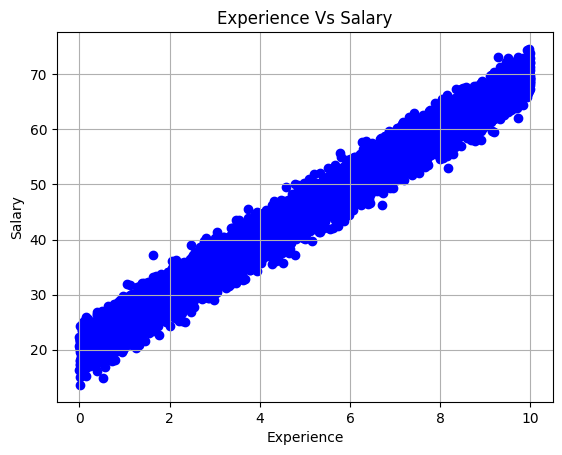

In [19]:
plt.Figure(figsize=(10,3))
plt.scatter(data['Experience'],data['Salary'],color = 'blue', label = 'data points')
plt.title("Experience Vs Salary")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

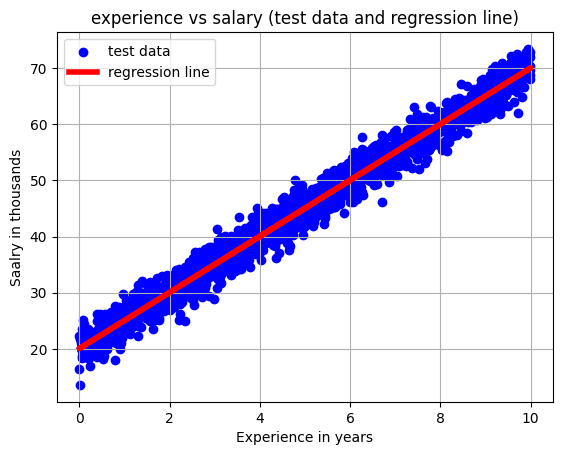

In [30]:
plt.scatter(X_test,y_test,color='blue',label = 'test data')
plt.plot(X_test,y_pred,color = 'red', lw =4,label='regression line')
plt.title("experience vs salary (test data and regression line)")
plt.xlabel('Experience in years')
plt.ylabel('Saalry in thousands')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

# Sample size
n = 10000

# Generate features
experience = np.random.rand(n, 1) * 10            # 0–10 years
education = np.random.rand(n, 1) * 5 + 10          # 10–15 years
location_index = np.random.rand(n, 1) * 2 + 1      # 1–3 scale
weekly_hours = np.random.rand(n, 1) * 10 + 30      # 30–40 hours/week
job_level = np.random.randint(1, 5, size=(n, 1))   # Integer 1–4

# True coefficients
coef_experience = 5
coef_education = 3
coef_location = 10
coef_hours = 2
coef_job = 15
intercept = 20

# Noise
noise = np.random.randn(n, 1) * 5

# Calculate target (salary)
salary = (coef_experience * experience +
          coef_education * education +
          coef_location * location_index +
          coef_hours * weekly_hours +
          coef_job * job_level +
          intercept + noise)

# Create DataFrame
data = pd.DataFrame(np.hstack([experience, education, location_index,
                               weekly_hours, job_level, salary]),
                    columns=["Experience", "Education", "LocationIndex",
                             "WeeklyHours", "JobLevel", "Salary"])

In [33]:
data.columns

Index(['Experience', 'Education', 'LocationIndex', 'WeeklyHours', 'JobLevel',
       'Salary'],
      dtype='object')

In [34]:
data.isnull().sum()

Experience       0
Education        0
LocationIndex    0
WeeklyHours      0
JobLevel         0
Salary           0
dtype: int64

In [39]:
X = data[['Experience', 'Education', 'LocationIndex', 'WeeklyHours', 'JobLevel']]
y = data['Salary']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [41]:
model = LinearRegression()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [44]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_pred = model.predict(X_test)

In [46]:
model.coef_

array([ 4.97686604,  2.99120092, 10.03063151,  1.99607983, 14.84543287])

In [47]:
model.intercept_

np.float64(20.90779183249947)

In [48]:
mean_squared_error(y_test,y_pred)

24.617150315701494

In [49]:
root_mean_squared_error(y_test,y_pred)

4.961567324515661

In [50]:
r2_score(y_test,y_pred)

0.9585898631955546

In [52]:
from sklearn.model_selection import KFold, cross_val_score

In [54]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [55]:
model1 = LinearRegression()

In [56]:
scores = cross_val_score(model1,X,y,cv=kf)

In [57]:
scores

array([0.95839038, 0.95851011, 0.95922606, 0.95886924, 0.95899608])